# detection for all types 

In [1]:
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
def get_len(info_comp):
    return len(info_comp)

def get_sql_char(info_comp):
    return len(re.findall("[?=\*#@%>]", info_comp, re.IGNORECASE))

def get_sql_word(info_comp):
    return len(re.findall("(SELECT)|(version)|(comment)|(user)|(FROM)|(mysql)|(host)|(DELET)|(name)|(MYSQL)|(WHERE)|(password)|(ORDER)",info_comp,re.IGNORECASE))

def get_xss_char(info_comp):
    return len(re.findall("[<>\"\'=&{}!#\*]", info_comp, re.IGNORECASE))

def get_xss_word(info_comp):
    return len(re.findall("(alert)|(script)|(XSS)|(SRC=)|(xss)|(onerror)|(onload)|(BODY)|(src=)|(INPUT)|(http)|(LINK)|(url=)|(SCRIPT)",info_comp,re.IGNORECASE))


def get_feature(info_comp):
    return [get_len(info_comp),get_evil_char(info_comp),get_evil_word(info_comp)]

# import data

## normal:12000  brut force:12000  sql:235  xss:452

In [2]:
import pandas as pd #数据分析
import numpy as np #科学计算
from pandas import Series,DataFrame
data_logs = pd.read_csv("./data/donnee.csv")
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label
0,0,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1
1,1,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1
2,2,136.133.92.208,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1
3,3,30.142.97.121,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1
4,4,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1
5,5,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1
6,6,136.133.92.208,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1
7,7,136.133.92.208,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1
8,8,136.133.92.208,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1
9,9,30.142.97.121,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1


# add new feature

In [3]:
data_logs['len']=data_logs['password'].apply(get_len)
data_logs['sqlchar']=data_logs['password'].apply(get_sql_char)
data_logs['sqlword']=data_logs['password'].apply(get_sql_word)
data_logs['xsschar']=data_logs['password'].apply(get_xss_char)
data_logs['xssword']=data_logs['password'].apply(get_xss_word)
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0
1,1,136.133.92.208,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0
2,2,136.133.92.208,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0
3,3,30.142.97.121,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0
4,4,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0
5,5,30.142.97.121,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0
6,6,136.133.92.208,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0
7,7,136.133.92.208,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0
8,8,136.133.92.208,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0
9,9,30.142.97.121,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0


# translate ip

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_logs['ip_address'] = le.fit_transform(data_logs['ip_address']) 
data_logs

,Unnamed: 0,ip_address,date,hour,minute,seconds,protocol,username,password,status,respsize,timed,label,len,sqlchar,sqlword,xsschar,xssword
0,0,330,22/Jan/2018,15,2,1,GET,director,123456,200,1040,312,1,6,0,0,0,0
1,1,330,22/Jan/2018,15,2,1,GET,director,123456,200,945,14,1,6,0,0,0,0
2,2,330,22/Jan/2018,15,2,2,GET,director,123456,200,34463,9,1,6,0,0,0,0
3,3,1414,22/Jan/2018,15,2,3,GET,administrator,123456,200,1040,2,1,6,0,0,0,0
4,4,1414,22/Jan/2018,15,2,4,GET,administrator,123456,200,945,9,1,6,0,0,0,0
5,5,1414,22/Jan/2018,15,2,4,GET,administrator,123456,200,34463,7,1,6,0,0,0,0
6,6,330,22/Jan/2018,15,2,6,POST,director,123456,200,1073,2547,1,6,0,0,0,0
7,7,330,22/Jan/2018,15,2,6,GET,director,123456,304,-,2,1,6,0,0,0,0
8,8,330,22/Jan/2018,15,2,7,GET,director,123456,304,-,9,1,6,0,0,0,0
9,9,1414,22/Jan/2018,15,2,7,POST,administrator,123456,200,1073,1583,1,6,0,0,0,0


In [5]:
del data_logs[data_logs.columns[0]]

# arrange feature

In [6]:
def replace(resp):
    if resp == '-':
        resp=0
    elif (resp==resp)==False:
        resp=0
    return (resp)
data_logs['respsize']=data_logs['respsize'].apply(replace)
data_logs['timed']=data_logs['timed'].apply(replace)
data_logs['status']=data_logs['status'].apply(replace)

# view of performance

In [10]:
from sklearn import metrics
def do_metrics(y_test,y_pred):
    print ("metrics.confusion_matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print ("metrics.accuracy_score:")
    print (metrics.accuracy_score(y_test, y_pred))
    print ("metrics.precision_score:")
    print (metrics.precision_score(y_test, y_pred))
    print ("metrics.recall_score:")
    print (metrics.recall_score(y_test, y_pred))
    print ("metrics.f1_score:")
    print (metrics.f1_score(y_test,y_pred))

In [21]:
import matplotlib.pyplot as plt
def plot_cm(cm, labels):
    
    # Compute percentanges
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)  # Derp, I'm sure there's a better way
    
    print ('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print ("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()))

    # Show confusion matrix
    # Thanks kermit666 from stackoverflow :)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='Greens')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# without ip

In [25]:
features = list(data_logs.columns[[8,9,10,12,13,14,15,16]])
X = data_logs[features]
X

,status,respsize,timed,len,sqlchar,sqlword,xsschar,xssword
0,200,1040,312,6,0,0,0,0
1,200,945,14,6,0,0,0,0
2,200,34463,9,6,0,0,0,0
3,200,1040,2,6,0,0,0,0
4,200,945,9,6,0,0,0,0
5,200,34463,7,6,0,0,0,0
6,200,1073,2547,6,0,0,0,0
7,304,0,2,6,0,0,0,0
8,304,0,9,6,0,0,0,0
9,200,1073,1583,6,0,0,0,0


In [8]:
y=data_logs['label']
y

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
24658    1
24659    1
24660    1
24661    1
24662    1
24663    1
24664    1
24665    1
24666    1
24667    1
24668    1
24669    1
24670    1
24671    1
24672    1
24673    1
24674    1
24675    1
24676    1
24677    1
24678    1
24679    1
24680    1
24681    1
24682    1
24683    1
24684    1
24685    1
24686    1
24687    1
Name: label, dtype: int64

In [26]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
'''
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
do_metrics(y_test, y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)
'''

"\nfrom sklearn import svm\nclf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)\ny_pred = clf.predict(X_test)\ndo_metrics(y_test, y_pred)\nlabels = ['no attaque', 'attaque']\ncm = metrics.confusion_matrix(y_test, y_pred)\nplot_cm(cm, labels)\n"

metrics.confusion_matrix:
[[2910  715]
 [1751 2031]]
metrics.accuracy_score:
0.667071688943
metrics.precision_score:
0.739621267298
metrics.recall_score:
0.537017451084
metrics.f1_score:
0.622242647059
Confusion Matrix Stats
no attaque/no attaque: 80.28% (2910/3625)
no attaque/attaque: 19.72% (715/3625)
attaque/no attaque: 46.30% (1751/3782)
attaque/attaque: 53.70% (2031/3782)


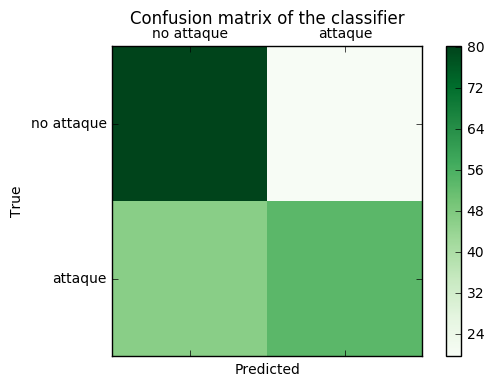

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# training
clf = clf.fit(X_train, y_train)
# classification
y_pred = clf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)
# performance

metrics.confusion_matrix:
[[2399 1226]
 [2060 1722]]
metrics.accuracy_score:
0.556365600108
metrics.precision_score:
0.584124830393
metrics.recall_score:
0.455314648334
metrics.f1_score:
0.511738484398
Confusion Matrix Stats
no attaque/no attaque: 66.18% (2399/3625)
no attaque/attaque: 33.82% (1226/3625)
attaque/no attaque: 54.47% (2060/3782)
attaque/attaque: 45.53% (1722/3782)


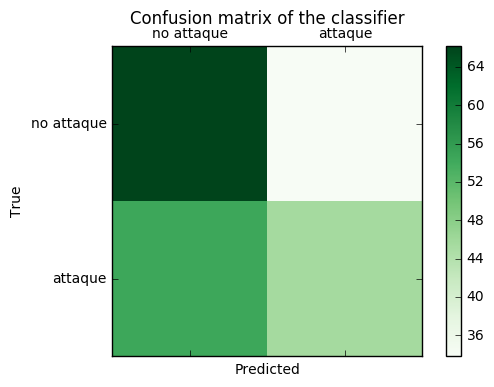

In [28]:
from sklearn.linear_model import LogisticRegression
# classifier
clf_log = LogisticRegression()
# training
clf_log = clf_log.fit(X_train, y_train)
# classification
y_pred = clf_log.predict(X_test)
# confusion matrix
labels = ['no attaque', 'attaque']
do_metrics(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

metrics.confusion_matrix:
[[2848  777]
 [1668 2114]]
metrics.accuracy_score:
0.669906844876
metrics.precision_score:
0.731234866828
metrics.recall_score:
0.55896351137
metrics.f1_score:
0.633598081822
Confusion Matrix Stats
no attaque/no attaque: 78.57% (2848/3625)
no attaque/attaque: 21.43% (777/3625)
attaque/no attaque: 44.10% (1668/3782)
attaque/attaque: 55.90% (2114/3782)


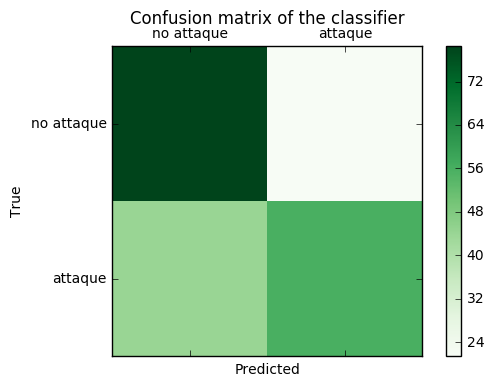

In [29]:
from sklearn.ensemble import RandomForestClassifier
# classifier
clf_rf = RandomForestClassifier()
# training
clf_rf = clf_rf.fit(X_train, y_train)
# classification
y_pred = clf_rf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

metrics.confusion_matrix:
[[2972  653]
 [1754 2028]]
metrics.accuracy_score:
0.675037127042
metrics.precision_score:
0.756434166356
metrics.recall_score:
0.536224219989
metrics.f1_score:
0.627572334829
Confusion Matrix Stats
no attaque/no attaque: 81.99% (2972/3625)
no attaque/attaque: 18.01% (653/3625)
attaque/no attaque: 46.38% (1754/3782)
attaque/attaque: 53.62% (2028/3782)


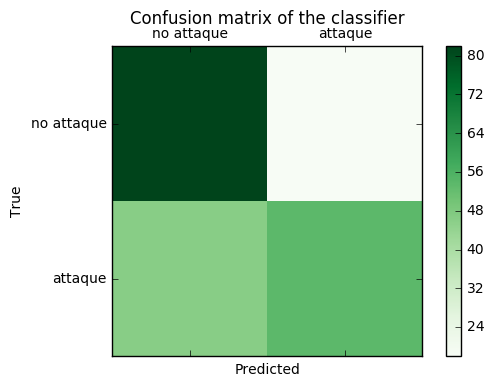

In [31]:
from sklearn.ensemble import AdaBoostClassifier
# classifier
clf_ada = AdaBoostClassifier(n_estimators=100)
# training
clf_ada = clf_ada.fit(X_train, y_train)
# classification
y_pred = clf_ada.predict(X_test)
# performance
do_metrics(y_test,y_pred)
# confusion matrix
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)

# with ip

metrics.confusion_matrix:
[[3622    3]
 [   0 3782]]
metrics.accuracy_score:
0.999594977724
metrics.precision_score:
0.999207397622
metrics.recall_score:
1.0
metrics.f1_score:
0.999603541694
Confusion Matrix Stats
no attaque/no attaque: 99.92% (3622/3625)
no attaque/attaque: 0.08% (3/3625)
attaque/no attaque: 0.00% (0/3782)
attaque/attaque: 100.00% (3782/3782)


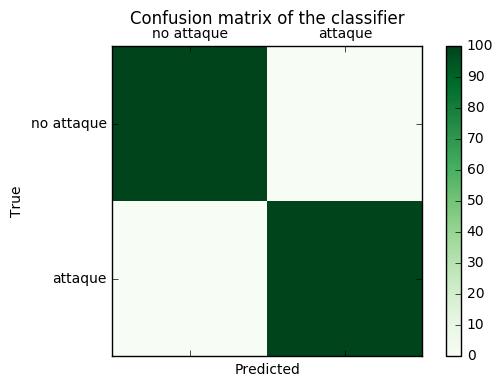

In [32]:
features = list(data_logs.columns[[0,8,9,10,12,13,14,15,16]])
X = data_logs[features]
y=data_logs['label']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
clf_rf = RandomForestClassifier()
# training
clf_rf = clf_rf.fit(X_train, y_train)
# classification
y_pred = clf_rf.predict(X_test)
# confusion matrix
do_metrics(y_test,y_pred)
labels = ['no attaque', 'attaque']
cm = metrics.confusion_matrix(y_test, y_pred)
plot_cm(cm, labels)